In [1]:
import numpy as np
from astropy.io import fits
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('tableau-colorblind10')
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle

In [2]:
#image_path = '/sps/lsst/groups/auxtel/data/raw_ncsa/'+obs_date+'/'
date = '20230316'
#image_path = '/sps/lsst/groups/auxtel/data/hack_usdf/my_postisrccd_img_forspectractor_2023/empty~holo4_003/{0}/empty-holo4_003/'.format(date)
image_path = '/pbs/throng/lsst/users/mrodrigu/my_postisrccd_img/{0}'.format(date)
image_label = 'exposure_{0}'.format(date)+'{0}_postisrccd.fits'
df_label = 'holosummary_{0}.csv'.format(date)
image_name = os.path.join(image_path,image_label)
df_name = os.path.join(image_path,df_label)
print(image_name)
print(df_name)

/pbs/throng/lsst/users/mrodrigu/my_postisrccd_img/20230316/exposure_20230316{0}_postisrccd.fits
/pbs/throng/lsst/users/mrodrigu/my_postisrccd_img/20230316/holosummary_20230316.csv


# Read data frame to obtain information about the exposures 

In [3]:
colnames = ["","id","obs_id","day_obs","seq_num","time_start","time_end","type","target","zenith_angle","expos","ra","dec","skyangle","science_program","jd","mjd"]

In [4]:
df = pd.read_csv(df_name, header=0, sep=',', usecols=np.arange(1,len(colnames)), names=colnames, index_col=False)

In [5]:
df

,id,obs_id,day_obs,seq_num,time_start,time_end,type,target,zenith_angle,expos,ra,dec,skyangle,science_program,jd,mjd
0,2023031600465,AT_O_20230316_000465,20230316,465,2023-03-17 06:21:17.961002,2023-03-17 06:21:48.203,science,HD185975,empty~holo4_003,60.572335,30.0,306.746064,-87.420358,339.962103,spec,2.460021e+06
1,2023031600466,AT_O_20230316_000466,20230316,466,2023-03-17 06:22:00.961010,2023-03-17 06:22:31.187,science,HD185975,empty~holo4_003,60.564685,30.0,306.745814,-87.420352,339.962194,spec,2.460021e+06
2,2023031600473,AT_O_20230316_000473,20230316,473,2023-03-17 06:27:18.678016,2023-03-17 06:27:48.917,science,HD73495,empty~holo4_003,61.662276,30.0,129.440720,-26.304083,201.720206,spec,2.460021e+06
3,2023031600474,AT_O_20230316_000474,20230316,474,2023-03-17 06:28:01.714998,2023-03-17 06:28:31.964,science,HD73495,empty~holo4_003,61.811732,30.0,129.440732,-26.304131,201.720052,spec,2.460021e+06
4,2023031600488,AT_O_20230316_000488,20230316,488,2023-03-17 06:41:22.129003,2023-03-17 06:41:52.366,science,HD111980,empty~holo4_003,15.228792,30.0,193.268446,-18.554949,234.010347,spec,2.460021e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2023031600723,AT_O_20230316_000723,20230316,723,2023-03-17 09:44:06.468003,2023-03-17 09:44:36.706,science,HD185975,empty~holo4_003,58.415402,30.0,307.791787,-87.427189,30.626692,spec,2.460021e+06
58,2023031600730,AT_O_20230316_000730,20230316,730,2023-03-17 09:49:04.678013,2023-03-17 09:49:34.919,science,HD167060,empty~holo4_003,34.978141,30.0,274.533339,-61.678254,52.744515,spec,2.460021e+06
59,2023031600731,AT_O_20230316_000731,20230316,731,2023-03-17 09:49:47.692988,2023-03-17 09:50:17.933,science,HD167060,empty~holo4_003,34.927126,30.0,274.533217,-61.678249,52.744603,spec,2.460021e+06
60,2023031600739,AT_O_20230316_000739,20230316,739,2023-03-17 09:55:12.796998,2023-03-17 09:55:43.041,science,HD146233,empty~holo4_003,23.344710,30.0,243.852365,-8.386274,252.272218,spec,2.460021e+06


In [6]:
seq_nums = np.array(df["seq_num"])
print(seq_nums)

[465 466 473 474 488 489 497 498 505 506 520 521 528 529 536 537 544 545
 553 554 561 562 569 570 577 578 589 590 597 598 608 609 616 617 624 625
 631 632 645 646 653 654 662 663 670 671 681 682 689 690 697 698 705 706
 713 714 722 723 730 731 739 740]


Organise pairs of exposures 

In [7]:
np.diff(seq_nums)
pairs = []
for i in range(len(seq_nums)-1):
    if seq_nums[i+1]-seq_nums[i]==1:
        pairs.append((seq_nums[i],seq_nums[i+1]))
pairs = np.array(pairs)

In [8]:
print(pairs)

[[465 466]
 [473 474]
 [488 489]
 [497 498]
 [505 506]
 [520 521]
 [528 529]
 [536 537]
 [544 545]
 [553 554]
 [561 562]
 [569 570]
 [577 578]
 [589 590]
 [597 598]
 [608 609]
 [616 617]
 [624 625]
 [631 632]
 [645 646]
 [653 654]
 [662 663]
 [670 671]
 [681 682]
 [689 690]
 [697 698]
 [705 706]
 [713 714]
 [722 723]
 [730 731]
 [739 740]]


# Check that things work for one spectrum 

In [9]:
ind0 = pairs[0][0]

In [10]:
f0 = fits.open(image_name.format(ind0))

In [11]:
#f0[0].header

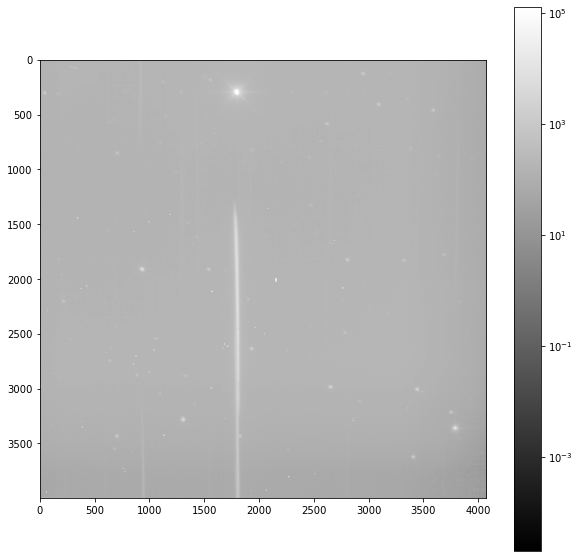

In [12]:
data0 = f0[1].data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = ax.imshow(data0,cmap="gray",norm=LogNorm())
fig.colorbar(im,ax=ax)

In [13]:
print(data0.shape)

(4000, 4072)


# Ratio of two consecutive spectra 

In [14]:
ind1 = pairs[0][0]
ind2 = pairs[0][1]

f1 = fits.open(image_name.format(ind1))
f2 = fits.open(image_name.format(ind2))

spec1 = f1[1].data
spec2 = f2[1].data

Show ratio 

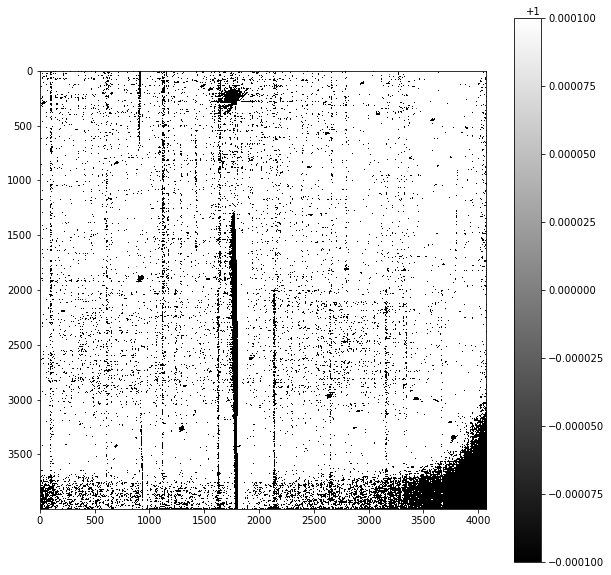

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = ax.imshow(spec1/spec2,cmap="gray",vmin=0.9999,vmax=1.0001)#,norm=LogNorm())
fig.colorbar(im,ax=ax)

In [16]:
spec1_ = spec1[0:3000,2000:2500]
spec2_ = spec2[0:3000,2000:2500]

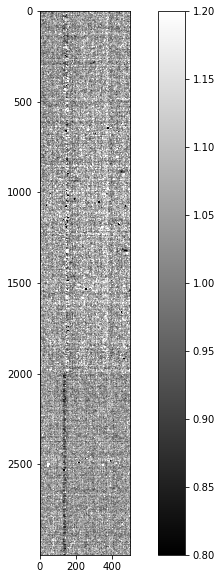

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = ax.imshow(spec1_/spec2_,cmap="gray",vmin=0.8,vmax=1.2)#,norm=LogNorm())
fig.colorbar(im,ax=ax)

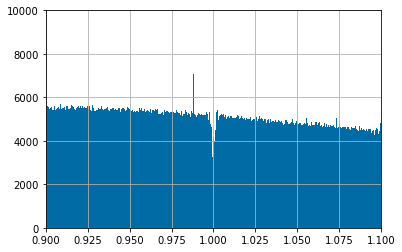

In [18]:
_ = plt.hist(spec1.ravel().astype('float')/spec2.ravel().astype('float'),range=(-0.5,2.50001),bins=10000)#,range=(0.8,1.2))
#plt.xscale("log")
#plt.yscale("log")
plt.xlim(0.9,1.1)
plt.ylim(0,10000)
plt.grid()

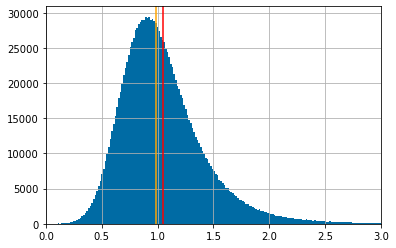

In [19]:
_ = plt.hist(spec1_.ravel()/spec2_.ravel(),range=(0.,3.),bins=200)#,range=(0.8,1.2))
plt.axvline(x=np.mean(spec1_.ravel()/spec2_.ravel()),color='r')
plt.axvline(x=np.median(spec1_.ravel()/spec2_.ravel()),color='orange')
#plt.xscale("log")
#plt.yscale("log")
plt.xlim(0,3.)
plt.grid()

In [20]:
print('Mean = ', np.mean(spec1_.ravel()/spec2_.ravel()))
print('Median = ', np.median(spec1_.ravel()/spec2_.ravel()))

Mean =  1.0509884
Median =  0.98695564


In [21]:
new_hdul = fits.HDUList()
hdu1 = fits.PrimaryHDU()
hdu2 = fits.ImageHDU()

hdu1.header = f0[0].header
hdu1.data = f0[0].data

hdu2.header = f0[1].header
hdu2.data = spec1/spec2

new_hdul.append(hdu1)
new_hdul.append(hdu2)


new_hdul.writeto('spectra_{0}_{1}_ratio_my_postisrccd.fits'.format(ind1,ind2), overwrite=True)


# Select zones to compute the mean and median on 

In [22]:
data0.shape

(4000, 4072)

In [23]:
n_zones = 3

#Zone 1 
x1_side = 200
y1_side = 400

x1_0 = 1850
y1_0 = 1550

#Zone 2 
x2_side = 200
y2_side = 400

x2_0 = 1850
y2_0 = 2050

#Zone 3 
x3_side = 200
y3_side = 200

x3_0 = data0.shape[1]-20-x3_side
y3_0 = data0.shape[0]-20-y3_side

zone_dict = {}
for iz in range(1,n_zones+1):
    x1_ = eval('x{0}_0'.format(iz))
    y1_ = eval('y{0}_0'.format(iz))
    xside_ = eval('x{0}_side'.format(iz))
    yside_ = eval('y{0}_side'.format(iz))
    zone_ = [x1_,y1_,xside_,yside_]
    
    zone_dict['zone{0}'.format(iz)] = zone_


In [24]:
zone_dict

{'zone1': [1850, 1550, 200, 400],
 'zone2': [1850, 2050, 200, 400],
 'zone3': [3852, 3780, 200, 200]}

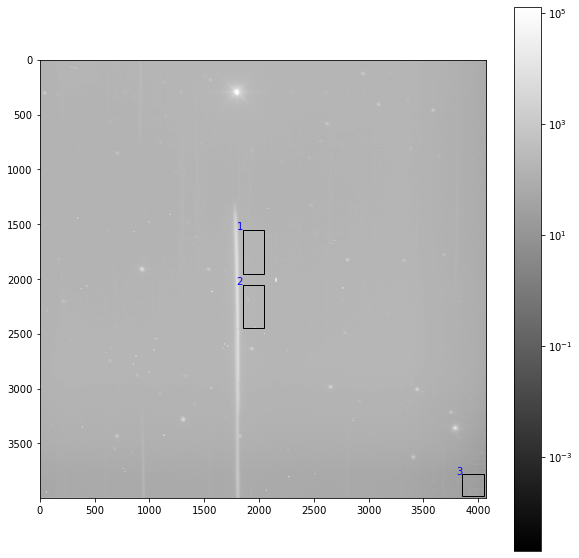

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = ax.imshow(data0,cmap="gray",norm=LogNorm())
for iz in range(1,n_zones+1):
    x1_ = zone_dict['zone{0}'.format(iz)][0]
    y1_ = zone_dict['zone{0}'.format(iz)][1]
    xside_ = zone_dict['zone{0}'.format(iz)][2]
    yside_ = zone_dict['zone{0}'.format(iz)][3]
    ax.add_patch(Rectangle((x1_,y1_),xside_,yside_,alpha=1.,fill=None))
    ax.text(x1_-55,y1_,'{0}'.format(iz),color='b')
    
#ax.add_patch(Rectangle((x2_0,y2_0),x2_side,y2_side,color='b',alpha=1.,fill=None))
fig.colorbar(im,ax=ax)

In [26]:
for iz in range(1,n_zones+1):
    print('Zone {0}'.format(iz))
    x1_ = zone_dict['zone{0}'.format(iz)][0]
    y1_ = zone_dict['zone{0}'.format(iz)][1]
    xside_ = zone_dict['zone{0}'.format(iz)][2]
    yside_ = zone_dict['zone{0}'.format(iz)][3]
    data0_ = data0[y1_:y1_+yside_,x1_:x1_+xside_]
    print('Mean = ', np.mean(data0_.ravel()))
    print('Median = ',np.median(data0_.ravel()))
    print('----------------')

Zone 1
Mean =  40.898518
Median =  40.784172
----------------
Zone 2
Mean =  44.87038
Median =  43.26777
----------------
Zone 3
Mean =  3.7254086
Median =  3.6592996
----------------


# No we organize the exposures in pairs 

In [27]:
metrics = ['mean','median']

In [28]:
x_ = np.arange(len(pairs))

dict_means_zones = {}
dict_medians_zones = {}

for p in pairs:
    #print(p)
    p = tuple(p)
    
    f1_ = fits.open(image_name.format(p[0]))
    f2_ = fits.open(image_name.format(p[1]))
    
    for iz in range(1,n_zones+1):
        
        x1_ = zone_dict['zone{0}'.format(iz)][0]
        y1_ = zone_dict['zone{0}'.format(iz)][1]
        xside_ = zone_dict['zone{0}'.format(iz)][2]
        yside_ = zone_dict['zone{0}'.format(iz)][3]
        
        data1_ = f1_[1].data[y1_:y1_+yside_,x1_:x1_+xside_]
        data2_ = f2_[1].data[y1_:y1_+yside_,x1_:x1_+xside_]
        
        p1_mean_ = np.mean(data1_)
        p2_mean_ = np.mean(data2_)
        
        p1_median_ = np.median(data1_)
        p2_median_ = np.median(data2_)
        
        dict_means_zones[(p,iz)] = (p1_mean_,p2_mean_)
        dict_medians_zones[(p,iz)] = (p1_median_,p2_median_)
        
    


In [29]:
#dict_means_zones

In [30]:
all_obs_times = []
#for i in range(int(len(obs_times_)/2)):
for ip in range(len(pairs)):
    obs_time_ = df["time_start"][2*ip]
    hour_ = obs_time_.split(' ')[1].split(':')[0]
    minute_ = obs_time_.split(' ')[1].split(':')[1]
    second_ = int(float(obs_time_.split(' ')[1].split(':')[2]))
    if second_<10:
        second_ = '0{0}'.format(second_)
    all_obs_times.append('{0}:{1}:{2}'.format(hour_,minute_,second_))
all_obs_times = np.array(all_obs_times)

In [31]:
all_obs_times

array(['06:21:17', '06:27:18', '06:41:22', '06:47:02', '06:52:28',
       '07:05:46', '07:11:38', '07:21:43', '07:27:14', '07:34:02',
       '07:38:27', '07:43:52', '07:48:29', '08:00:15', '08:06:02',
       '08:16:00', '08:21:19', '08:25:50', '08:33:08', '08:44:13',
       '08:49:56', '08:55:43', '09:00:14', '09:17:43', '09:23:29',
       '09:28:51', '09:33:11', '09:37:41', '09:43:23', '09:49:04',
       '09:55:12'], dtype='<U8')

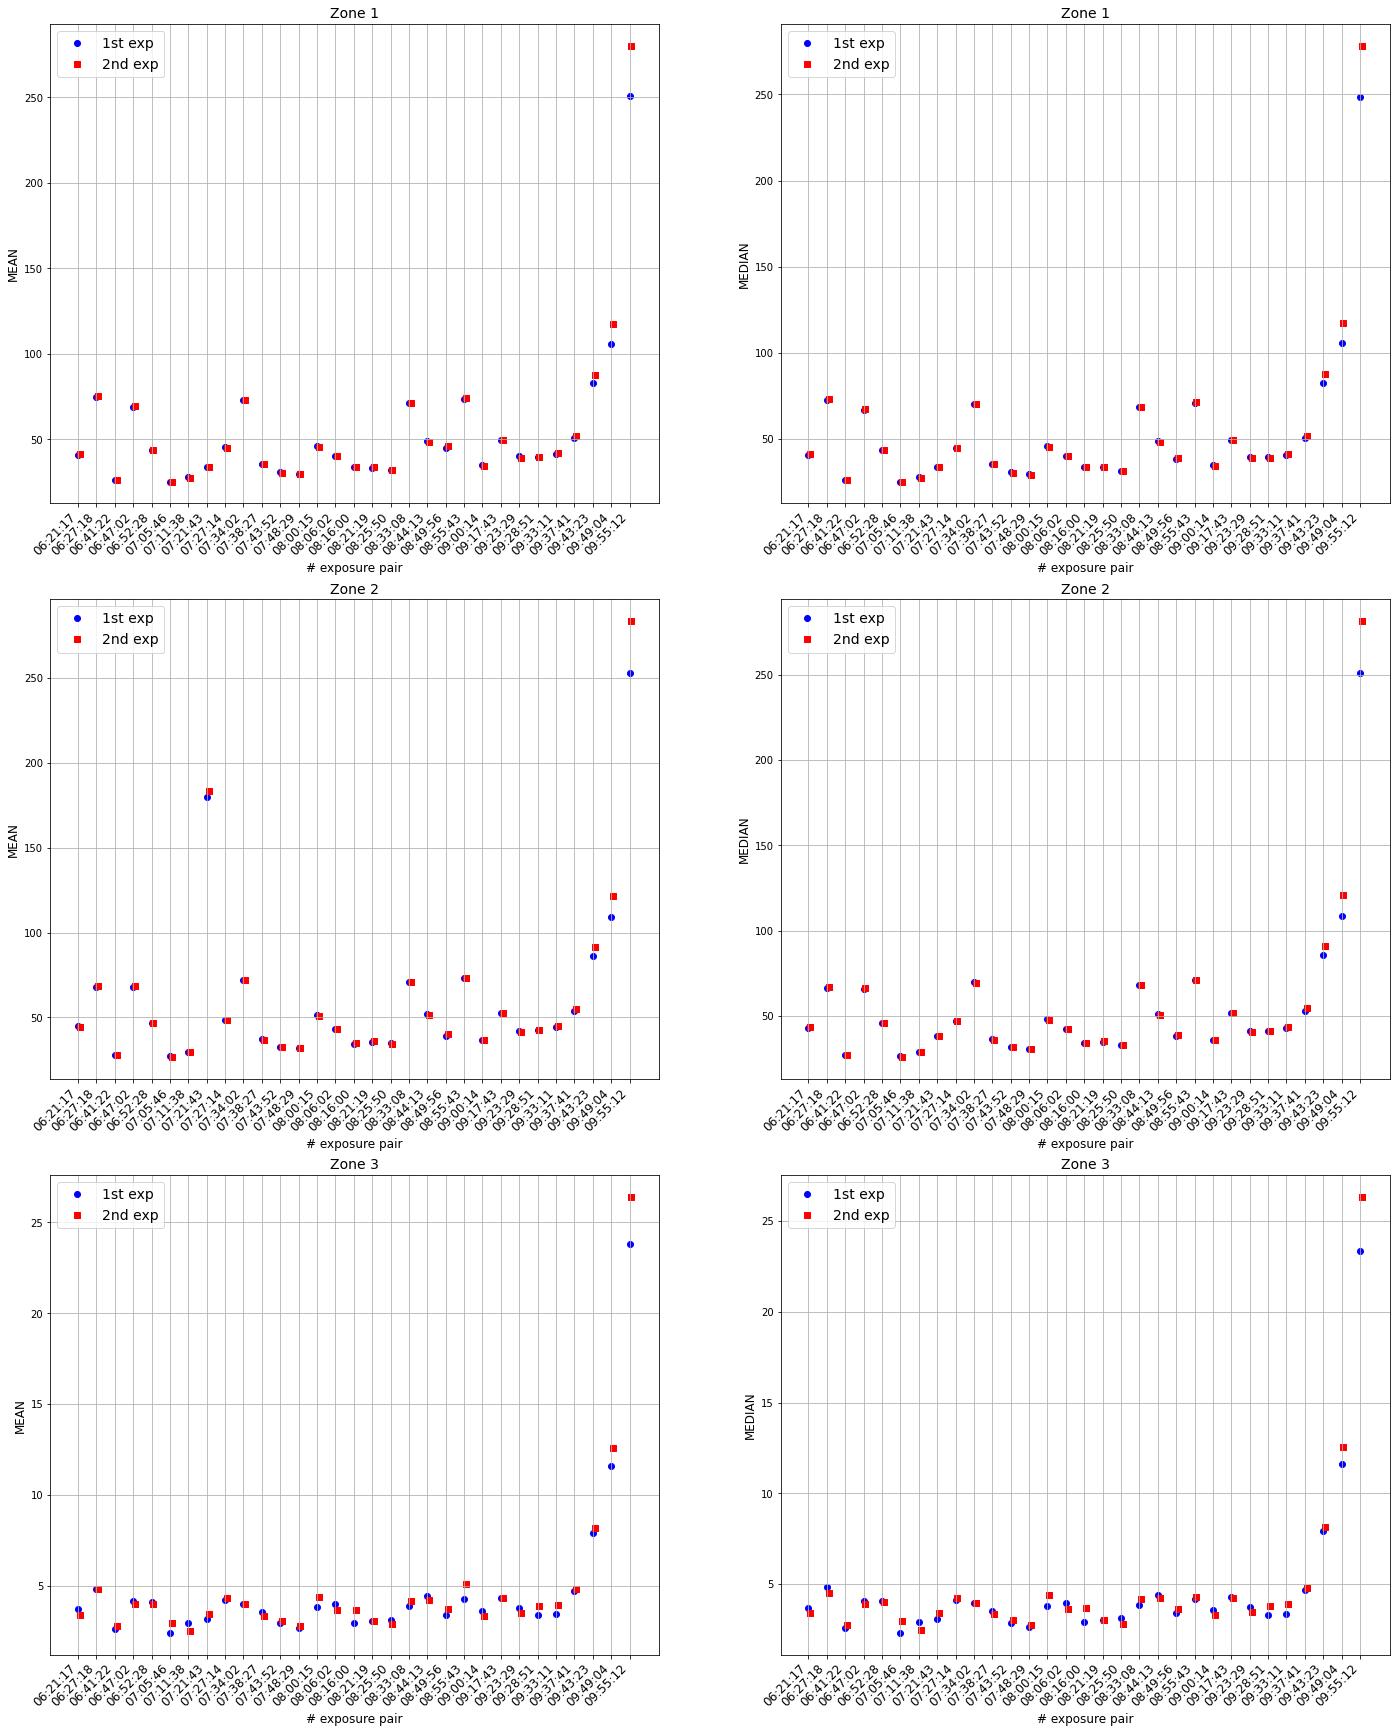

In [32]:

fig,axs = plt.subplots(n_zones,len(metrics),figsize=(24,30))

for im,m in enumerate(metrics):
    dict_ = eval('dict_{0}s_zones'.format(m))
    for iz in range(1,n_zones+1):
        for ip,p_ in enumerate(pairs):
            p_ = tuple(p_)
            
            axs[iz-1,im].scatter(x_[ip],dict_[p_,iz][0],marker='o',color='b')
            axs[iz-1,im].scatter(x_[ip]+0.1,dict_[p_,iz][1],marker='s',color='r')
        axs[iz-1,im].plot([],[],ls='',marker='o',color='b',label='1st exp')
        axs[iz-1,im].plot([],[],ls='',marker='s',color='r',label='2nd exp')
        axs[iz-1,im].grid()
        axs[iz-1,im].set_xlabel('# exposure pair',fontsize=12)
        axs[iz-1,im].set_ylabel(m.upper(),fontsize=12)
        axs[iz-1,im].set_xticks(ticks=x_)
        axs[iz-1,im].set_xticklabels(labels=all_obs_times,rotation=45.,ha='right',fontsize=12)
        axs[iz-1,im].set_title('Zone {0}'.format(iz),fontsize=14)
        axs[iz-1,im].legend(loc="best",fontsize=14)

# Now we apply cuts to select the exposures 

We want to separate the exposures taken before the nautic twilight of the observation day and from the ones taken after 

In [33]:
date

'20230316'

Define the twilight time of the date 

In [34]:
twilight_hour = 9
twilight_minute = 23

In [35]:
year=int(date[0:4])
month_ = date[4:6]
if int(month_)<10:
    month = int(month_[1])
else:
    month = int(month_)
day=int(date[6:])+1#########################
twilight = datetime.datetime(year=year,month=month,day=day,hour=twilight_hour,minute=twilight_minute)
print(twilight)

2023-03-17 09:23:00


Select exposure times (note that we only save the time of the first exposure from each pair) 

In [36]:
time_mask = np.zeros(len(all_obs_times)).astype('bool')
time_mask_df = np.zeros(2*len(all_obs_times)).astype('bool')
for i,t_ in enumerate(all_obs_times):
    hour_ = int(t_.split(':')[0])
    minute_ = int(t_.split(':')[1])
    second_ = int(float(t_.split(':')[2]))
    
    time_ = datetime.datetime(year=year,month=month,day=day,hour=hour_,minute=minute_,second=second_)
    
    #print(time_,twilight,time_<twilight)
    if time_<twilight:
        time_mask[i] = True
        time_mask_df[2*i] = True
        time_mask_df[2*i+1] = True
    

In [37]:
all_obs_times

array(['06:21:17', '06:27:18', '06:41:22', '06:47:02', '06:52:28',
       '07:05:46', '07:11:38', '07:21:43', '07:27:14', '07:34:02',
       '07:38:27', '07:43:52', '07:48:29', '08:00:15', '08:06:02',
       '08:16:00', '08:21:19', '08:25:50', '08:33:08', '08:44:13',
       '08:49:56', '08:55:43', '09:00:14', '09:17:43', '09:23:29',
       '09:28:51', '09:33:11', '09:37:41', '09:43:23', '09:49:04',
       '09:55:12'], dtype='<U8')

Take a sub dataframe from the original one based on the time of the exposures 

In [38]:
df_time = df[time_mask_df]
obs_times = np.array(all_obs_times[time_mask])

In [39]:
obs_times

array(['06:21:17', '06:27:18', '06:41:22', '06:47:02', '06:52:28',
       '07:05:46', '07:11:38', '07:21:43', '07:27:14', '07:34:02',
       '07:38:27', '07:43:52', '07:48:29', '08:00:15', '08:06:02',
       '08:16:00', '08:21:19', '08:25:50', '08:33:08', '08:44:13',
       '08:49:56', '08:55:43', '09:00:14', '09:17:43'], dtype='<U8')

Reevaluate the pairs after selecting exposures based on observing time 

In [40]:
seq_nums_t = np.array(df["seq_num"])
print(seq_nums_t)
np.diff(seq_nums_t)
pairs_t = []
for i in range(len(seq_nums_t)-1):
    if seq_nums_t[i+1]-seq_nums_t[i]==1:
        pairs_t.append((seq_nums_t[i],seq_nums_t[i+1]))
pairs_t = np.array(pairs_t)[time_mask]

[465 466 473 474 488 489 497 498 505 506 520 521 528 529 536 537 544 545
 553 554 561 562 569 570 577 578 589 590 597 598 608 609 616 617 624 625
 631 632 645 646 653 654 662 663 670 671 681 682 689 690 697 698 705 706
 713 714 722 723 730 731 739 740]


In [41]:
x_t = np.arange(len(pairs_t))

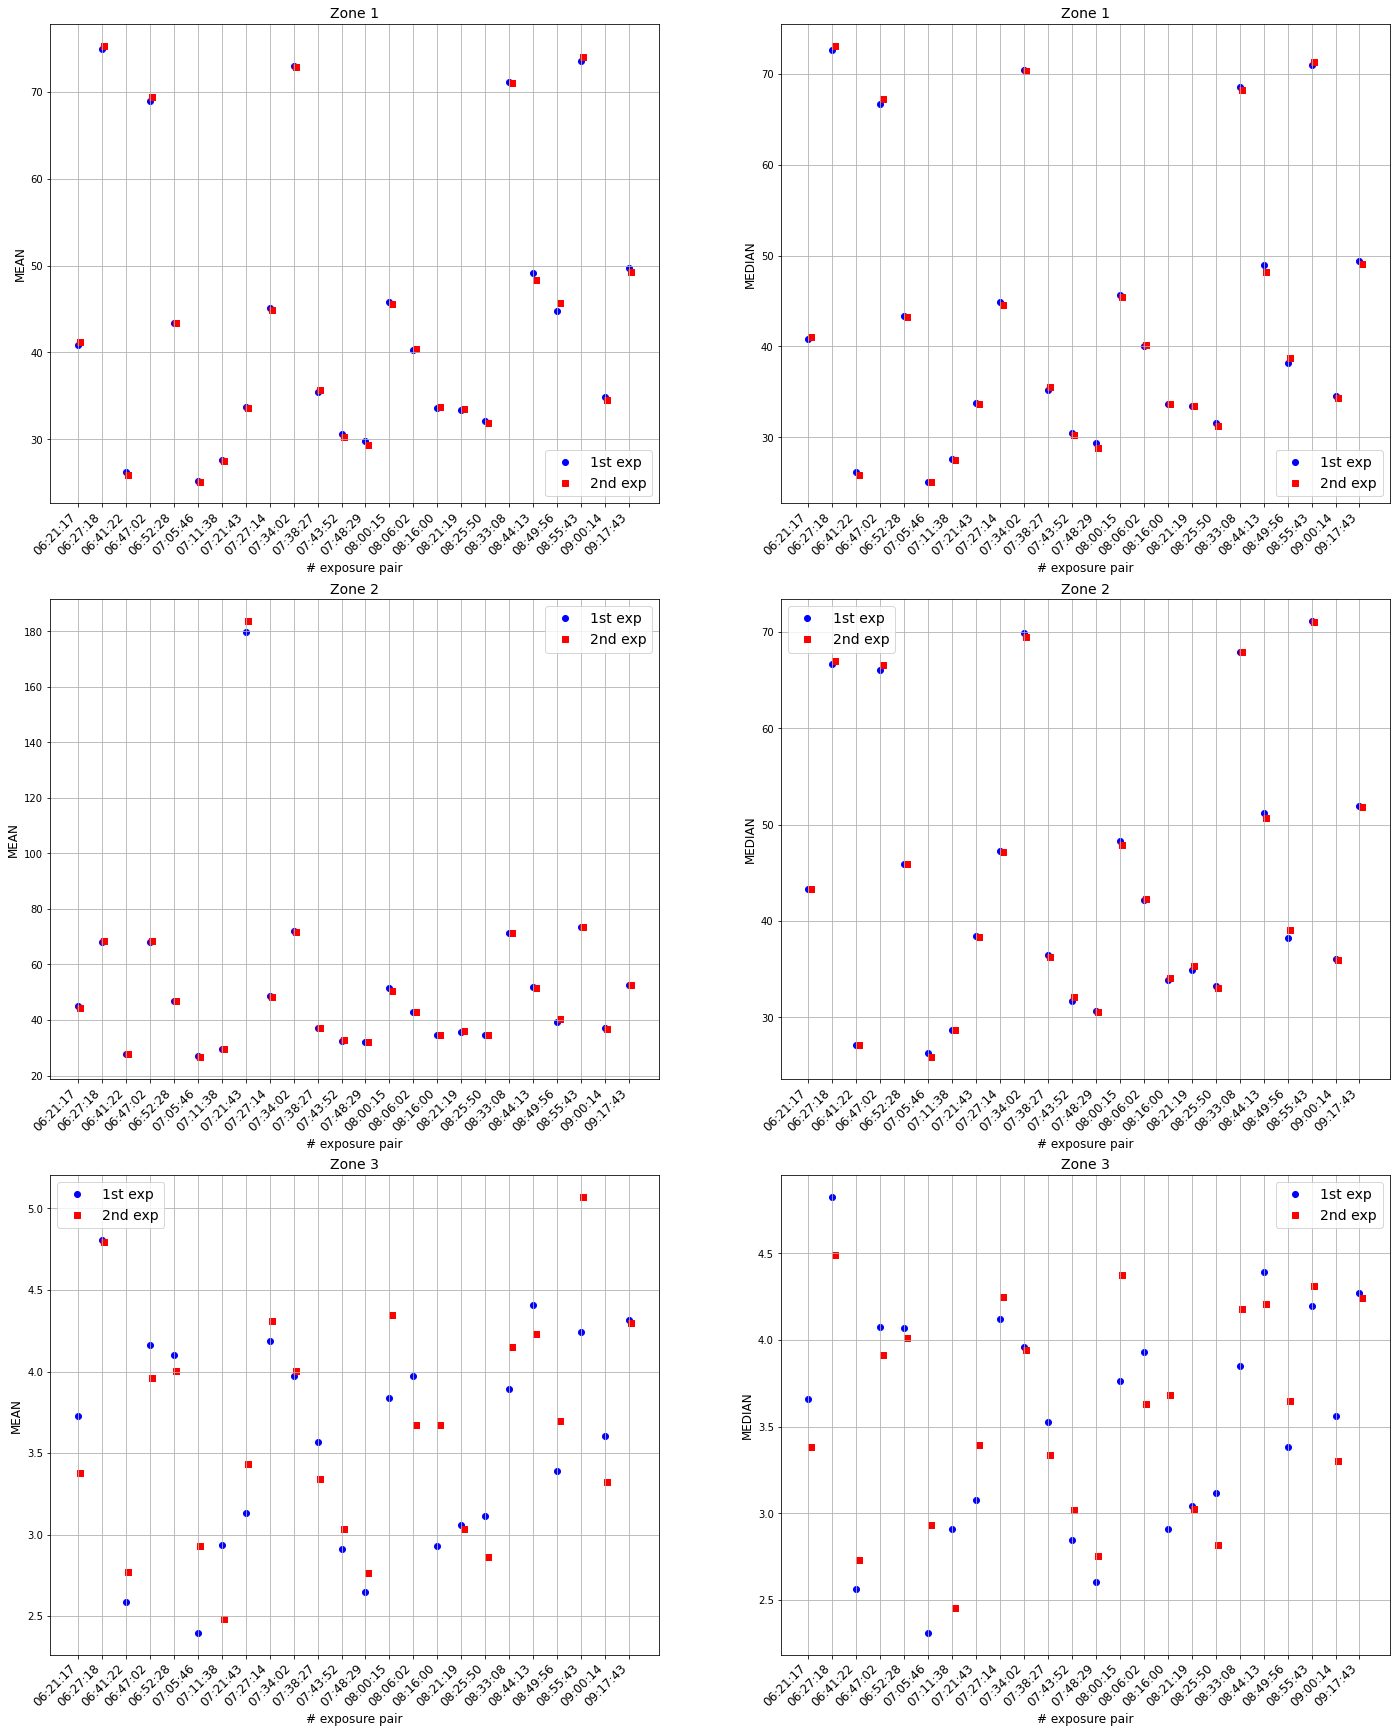

In [42]:

fig,axs = plt.subplots(n_zones,len(metrics),figsize=(24,30))

for im,m in enumerate(metrics):
    dict_ = eval('dict_{0}s_zones'.format(m))
    for iz in range(1,n_zones+1):
        for ip,p_ in enumerate(pairs_t):
            p_ = tuple(p_)
            
            axs[iz-1,im].scatter(x_t[ip],dict_[p_,iz][0],marker='o',color='b')
            axs[iz-1,im].scatter(x_t[ip]+0.1,dict_[p_,iz][1],marker='s',color='r')
        axs[iz-1,im].plot([],[],ls='',marker='o',color='b',label='1st exp')
        axs[iz-1,im].plot([],[],ls='',marker='s',color='r',label='2nd exp')
        axs[iz-1,im].grid()
        axs[iz-1,im].set_xlabel('# exposure pair',fontsize=12)
        axs[iz-1,im].set_ylabel(m.upper(),fontsize=12)
        axs[iz-1,im].set_xticks(ticks=x_t)
        axs[iz-1,im].set_xticklabels(labels=obs_times,rotation=45.,ha='right',fontsize=12)
        axs[iz-1,im].set_title('Zone {0}'.format(iz),fontsize=14)
        axs[iz-1,im].legend(loc="best",fontsize=14)

# Now we differentiate between sources 

In [43]:
sources = np.unique(np.array(df_time["target"]))
print(sources)

['HD111980' 'HD115169' 'HD142331' 'HD146233' 'HD167060' 'HD185975'
 'HD73495']


In [44]:
for s in sources:
    print(s,len(df_time["target"][df_time["target"]==s]))
    print(df_time["seq_num"][df_time["target"]==s])

HD111980 8
4     488
5     489
12    528
13    529
22    569
23    570
32    616
33    617
Name: seq_num, dtype: int64
HD115169 6
10    520
11    521
24    577
25    578
34    624
35    625
Name: seq_num, dtype: int64
HD142331 8
14    536
15    537
20    561
21    562
30    608
31    609
44    670
45    671
Name: seq_num, dtype: int64
HD146233 8
6     497
7     498
18    553
19    554
36    631
37    632
42    662
43    663
Name: seq_num, dtype: int64
HD167060 4
28    597
29    598
40    653
41    654
Name: seq_num, dtype: int64
HD185975 12
0     465
1     466
8     505
9     506
16    544
17    545
26    589
27    590
38    645
39    646
46    681
47    682
Name: seq_num, dtype: int64
HD73495 2
2    473
3    474
Name: seq_num, dtype: int64


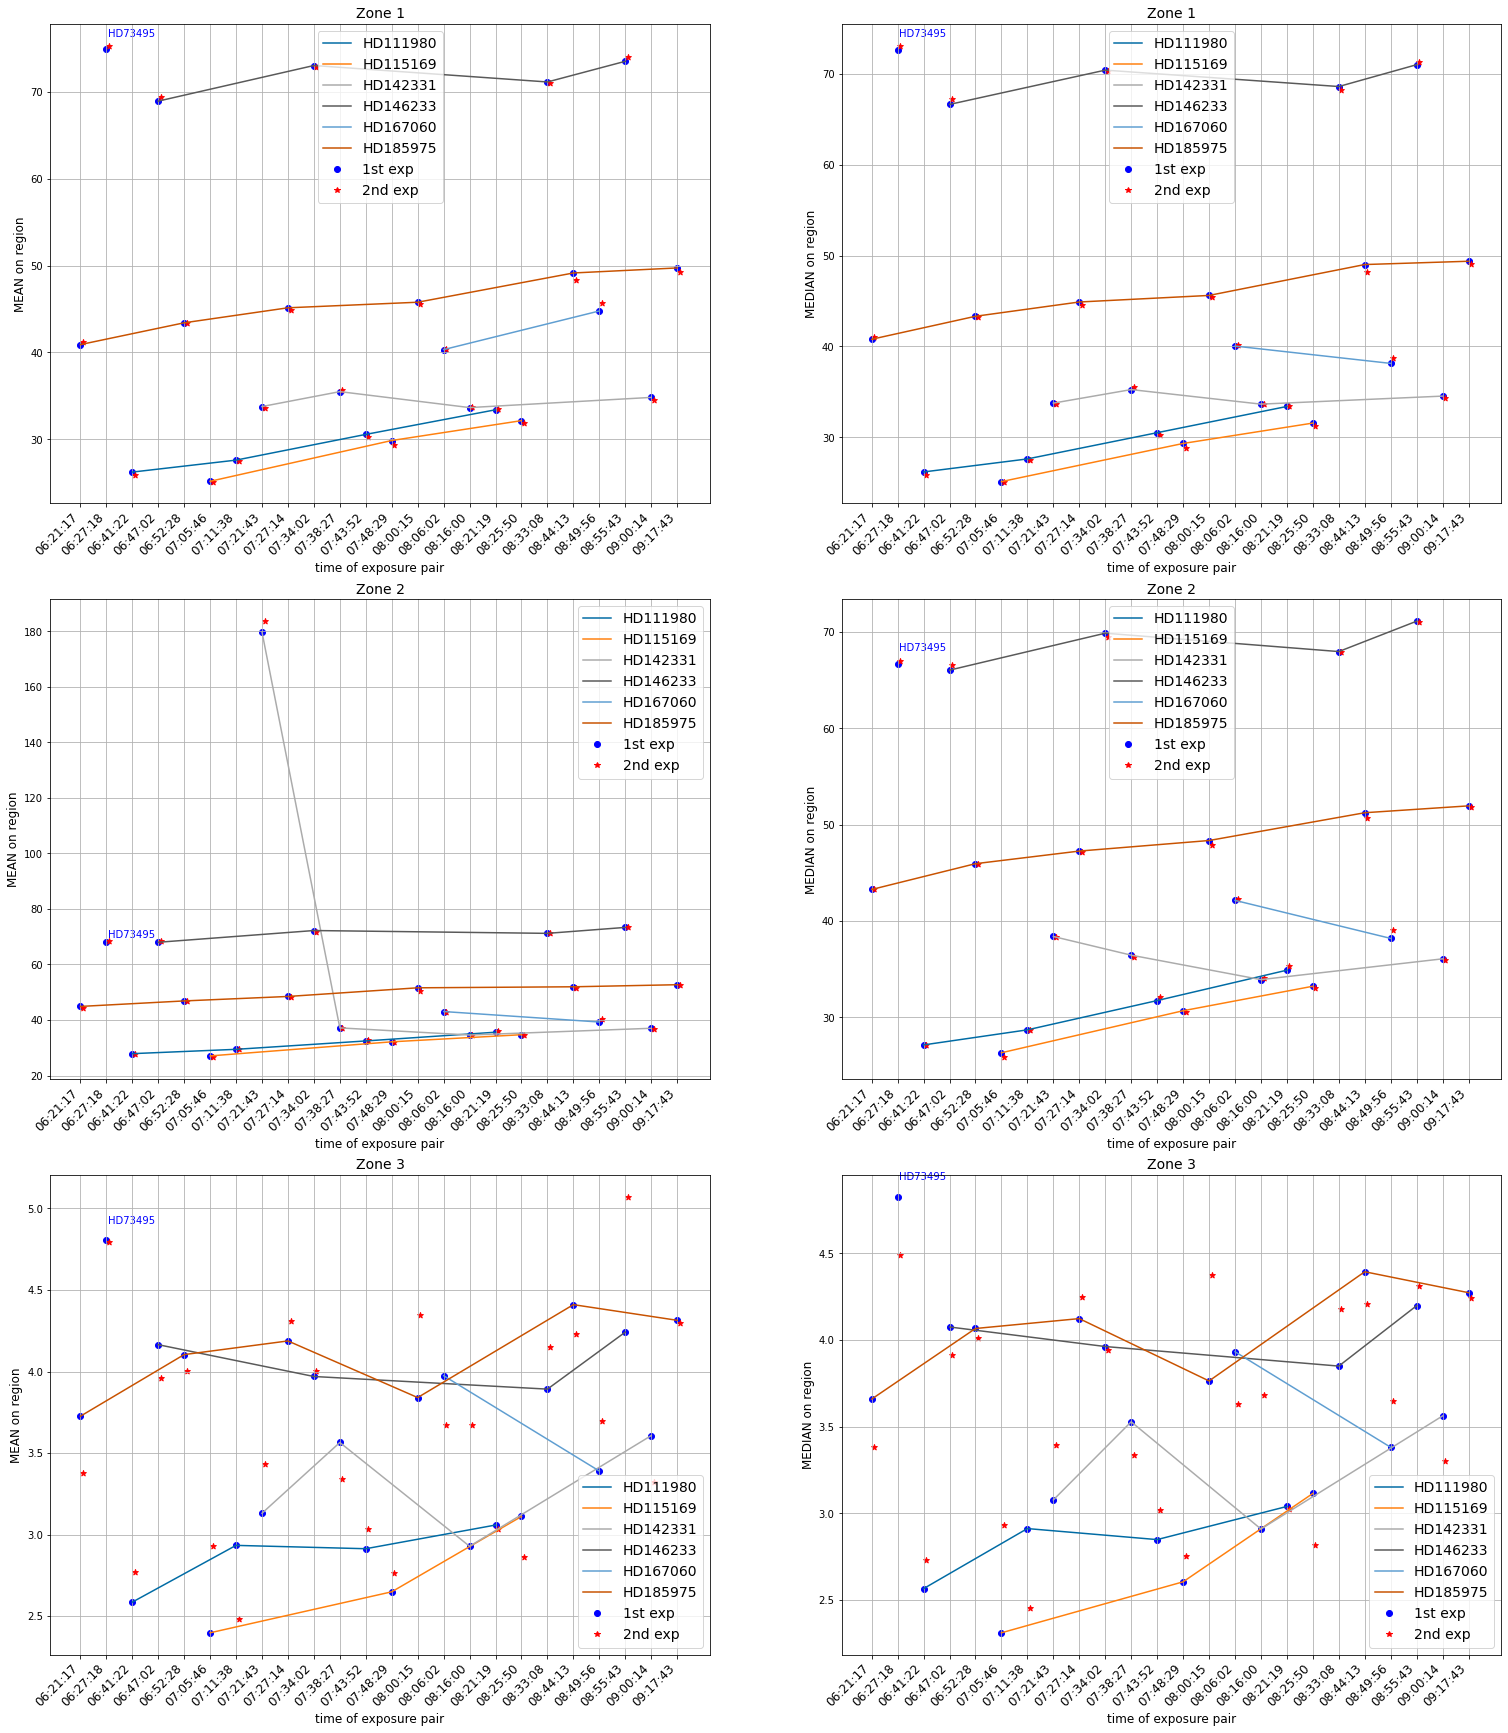

In [45]:

fig,axs = plt.subplots(n_zones,len(metrics),figsize=(26,30))


for im,m in enumerate(metrics):
    dict_ = eval('dict_{0}s_zones'.format(m))
    for iz in range(1,n_zones+1):
        
        for source in sources:
            #print(source)
            
            svec_ = np.array(df_time["target"])
            source_mask = svec_==source
            source_mask_ = []
            for sm in range(int(len(source_mask)/2)):
                source_mask_.append(source_mask[2*sm])
            source_mask_ = np.array(source_mask_)
            
            seq_nums_ts = np.array(df_time[source_mask]["seq_num"])
            np.diff(seq_nums_t)
            pairs_ts = []
            for i in range(len(seq_nums_ts)-1):
                if seq_nums_ts[i+1]-seq_nums_ts[i]==1:
                    pairs_ts.append((seq_nums_ts[i],seq_nums_ts[i+1]))
            pairs_ts = np.array(pairs_ts)
            
            obs_timess = obs_times[source_mask_]
            
            x_ts = x_t[source_mask_]
            
            m1_ = []
            m2_ = []
            for i,p_ in enumerate(pairs_ts):
                p_ = tuple(p_)
                
                axs[iz-1,im].scatter(x_ts[i],dict_[p_,iz][0],marker='o',color='b')
                axs[iz-1,im].scatter(x_ts[i]+0.1,dict_[p_,iz][1],marker='*',color='r')
                
                m1_.append(dict_[p_,iz][0])
                m2_.append(dict_[p_,iz][1])
            m1_ = np.array(m1_)
            m2_ = np.array(m2_)
            
            if len(m1_)>1:
                axs[iz-1,im].plot(x_ts,m1_,ls='-',marker='',alpha=1.0,label=source)
            else:
                axs[iz-1,im].text(x_ts+0.05,m1_+m1_*0.02,source,color='b',zorder=-1)
            
        axs[iz-1,im].plot([],[],ls='',marker='o',color='b',label='1st exp')
        axs[iz-1,im].plot([],[],ls='',marker='*',color='r',label='2nd exp')
        #axs[iz-1,im].set_ylim(20.,100.)
        axs[iz-1,im].grid()
        axs[iz-1,im].set_xlabel('time of exposure pair',fontsize=12)
        axs[iz-1,im].set_ylabel('{0} on region'.format(m.upper()),fontsize=12)
        axs[iz-1,im].set_xticks(ticks=x_t)
        axs[iz-1,im].set_xticklabels(labels=obs_times,rotation=45.,ha='right',fontsize=12)
        axs[iz-1,im].set_title('Zone {0}'.format(iz),fontsize=14)
        axs[iz-1,im].legend(loc="best",fontsize=14)




Separated plots for better visibility 

Zone 1
Zone 2
Zone 3
Zone 1
Zone 2
Zone 3


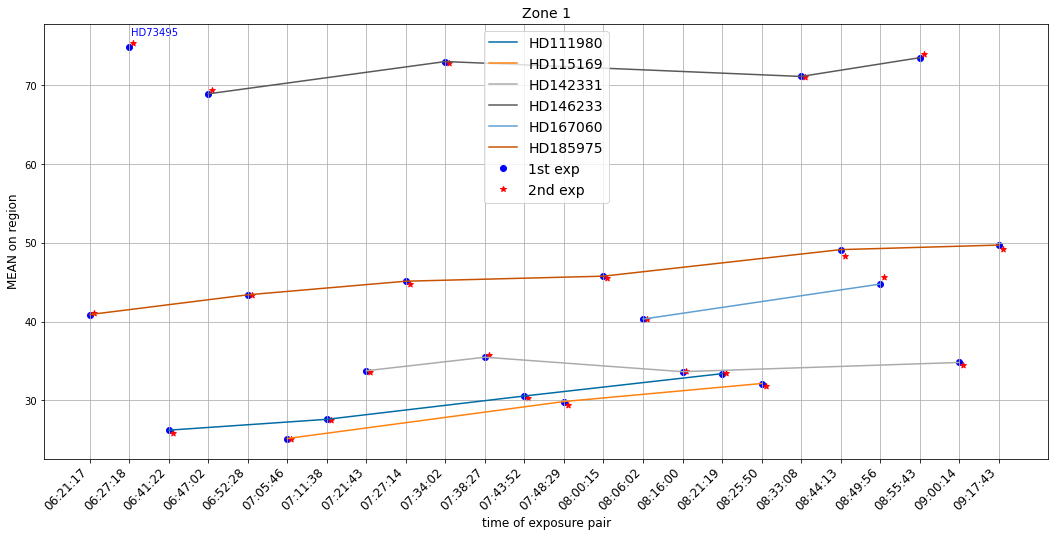

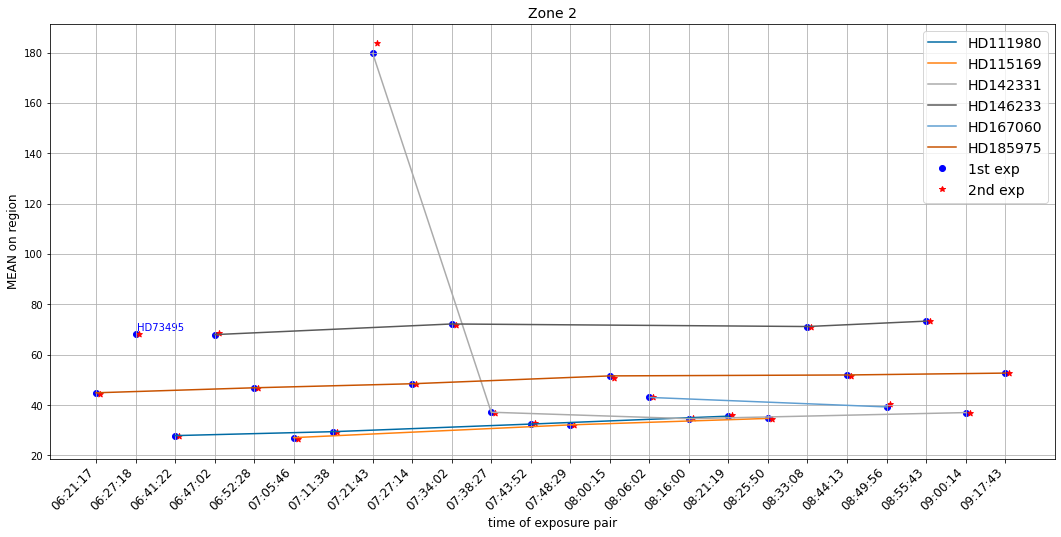

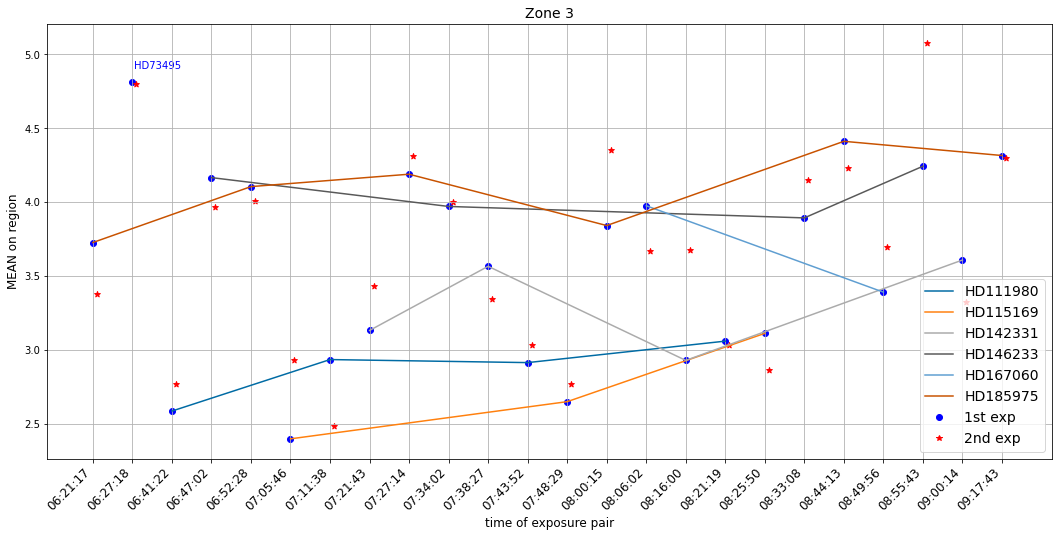

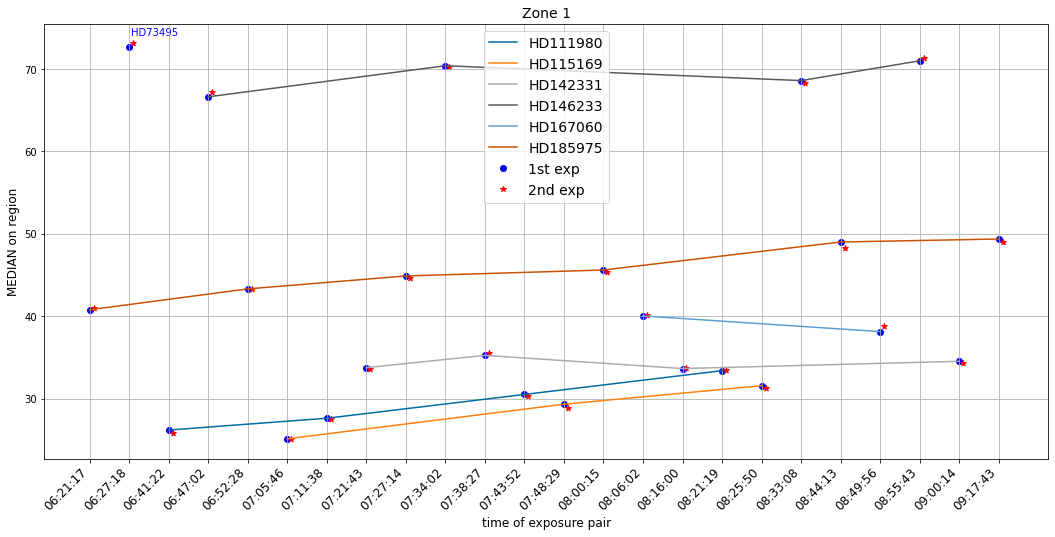

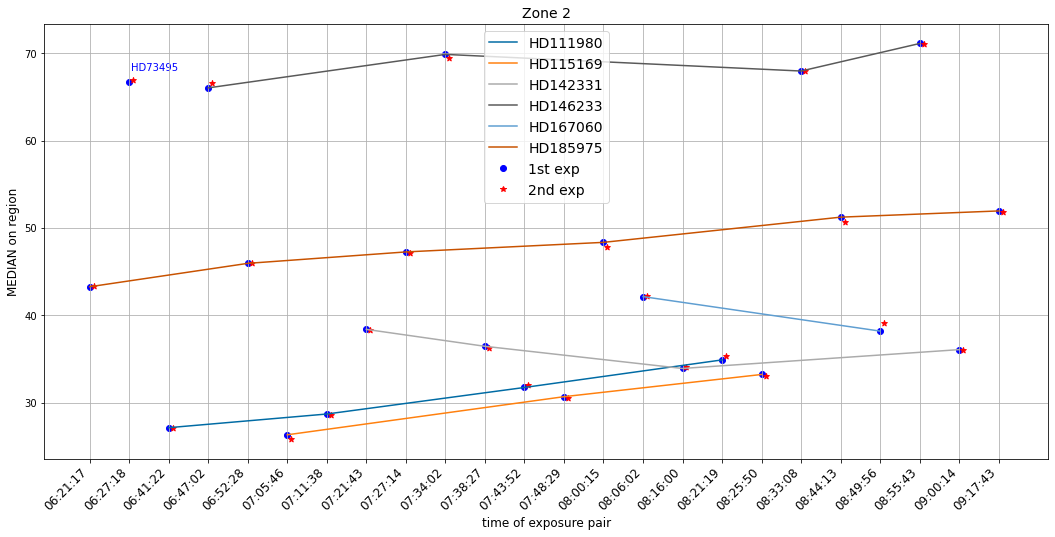

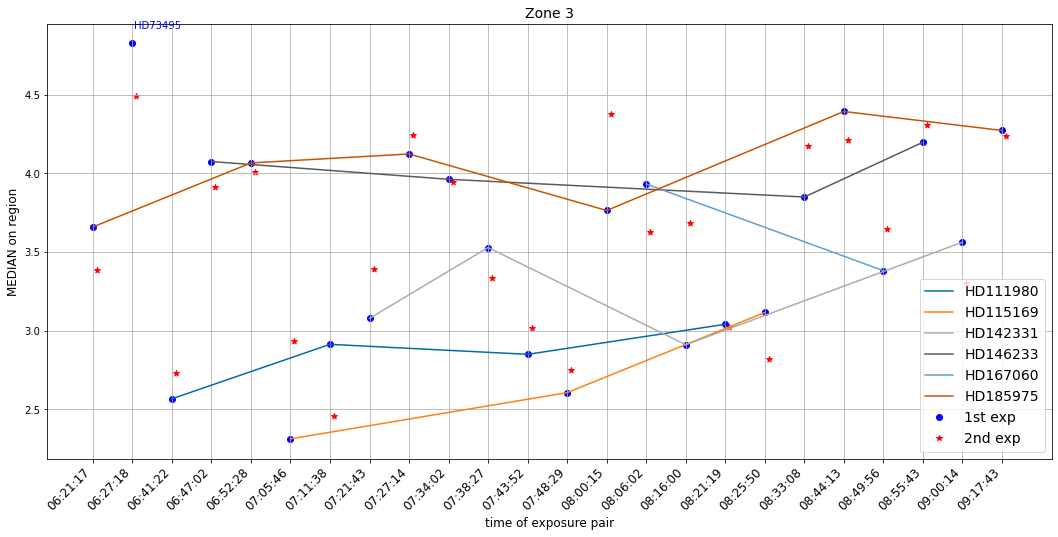

In [46]:

for im,m in enumerate(metrics):
    dict_ = eval('dict_{0}s_zones'.format(m))
    for iz in range(1,n_zones+1):
        print('Zone {0}'.format(iz))
        fig,axs = plt.subplots(1,1,figsize=(18,8))
        for source in sources:
            #print(source)
            
            svec_ = np.array(df_time["target"])
            source_mask = svec_==source
            source_mask_ = []
            for sm in range(int(len(source_mask)/2)):
                source_mask_.append(source_mask[2*sm])
            source_mask_ = np.array(source_mask_)
            
            seq_nums_ts = np.array(df_time[source_mask]["seq_num"])
            np.diff(seq_nums_t)
            pairs_ts = []
            for i in range(len(seq_nums_ts)-1):
                if seq_nums_ts[i+1]-seq_nums_ts[i]==1:
                    pairs_ts.append((seq_nums_ts[i],seq_nums_ts[i+1]))
            pairs_ts = np.array(pairs_ts)
            
            obs_timess = obs_times[source_mask_]
            
            x_ts = x_t[source_mask_]
            
            m1_ = []
            m2_ = []
            for i,p_ in enumerate(pairs_ts):
                p_ = tuple(p_)
                
                axs.scatter(x_ts[i],dict_[p_,iz][0],marker='o',color='b')
                axs.scatter(x_ts[i]+0.1,dict_[p_,iz][1],marker='*',color='r')
                
                m1_.append(dict_[p_,iz][0])
                m2_.append(dict_[p_,iz][1])
            m1_ = np.array(m1_)
            m2_ = np.array(m2_)
            
            if len(m1_)>1:
                axs.plot(x_ts,m1_,ls='-',marker='',alpha=1.0,label=source)
            else:
                axs.text(x_ts+0.05,m1_+m1_*0.02,source,color='b',zorder=-1)
            
        axs.plot([],[],ls='',marker='o',color='b',label='1st exp')
        axs.plot([],[],ls='',marker='*',color='r',label='2nd exp')
        #axs.set_ylim(20.,100.)
        axs.grid()
        axs.set_xlabel('time of exposure pair',fontsize=12)
        axs.set_ylabel('{0} on region'.format(m.upper()),fontsize=12)
        axs.set_xticks(ticks=x_t)
        axs.set_xticklabels(labels=obs_times,rotation=45.,ha='right',fontsize=12)
        axs.set_title('Zone {0}'.format(iz),fontsize=14)
        axs.legend(loc="best",fontsize=14)


